# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | ketchikan
Processing Record 4 of Set 1 | lompoc
Processing Record 5 of Set 1 | howard springs
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | mesquite
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | vilyuchinsk
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | chicoana
Processing Record 12 of Set 1 | ocean shores
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | rio grande
Processing Record 16 of Set 1 | basco
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | itaituba
Processing Record 19 of Set 1 | laojunmiao
Processing Record 20 of Set 1 | zapolyarnyy
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | k

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,273.87,68,20,4.11,TF,1722876247
1,blackmans bay,-43.0167,147.3167,283.56,74,95,0.89,AU,1722876248
2,ketchikan,55.3422,-131.6461,290.56,82,0,2.06,US,1722876249
3,lompoc,34.6391,-120.4579,295.29,98,100,1.54,US,1722875991
4,howard springs,-12.4970,131.0470,296.10,87,4,1.24,AU,1722875752


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,273.87,68,20,4.11,TF,1722876247
1,blackmans bay,-43.0167,147.3167,283.56,74,95,0.89,AU,1722876248
2,ketchikan,55.3422,-131.6461,290.56,82,0,2.06,US,1722876249
3,lompoc,34.6391,-120.4579,295.29,98,100,1.54,US,1722875991
4,howard springs,-12.4970,131.0470,296.10,87,4,1.24,AU,1722875752


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

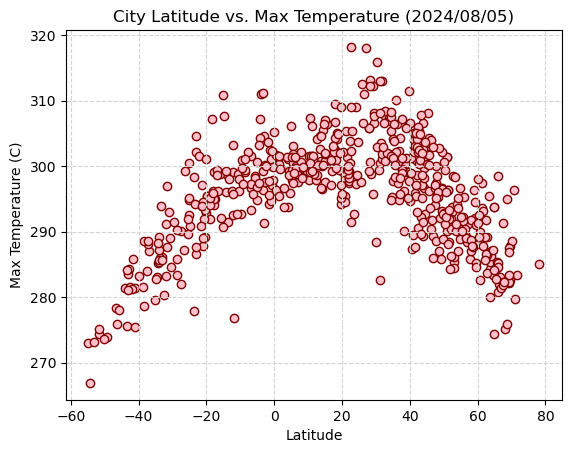

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], c="pink", linewidths=1, edgecolor="maroon", marker="o", label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2024/08/05)")
plt.grid (visible=True, which="major", axis="both", ls="--", c="lightgrey")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

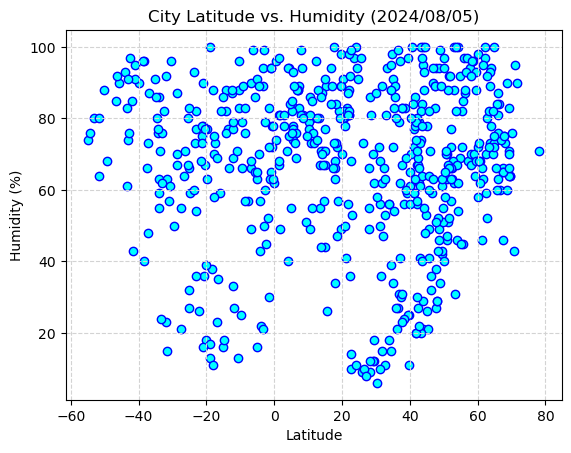

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], c="cyan", linewidths=1, edgecolor="blue", marker="o", label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2024/08/05)")
plt.grid (visible=True, which="major", axis="both", ls="--", c="lightgrey")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

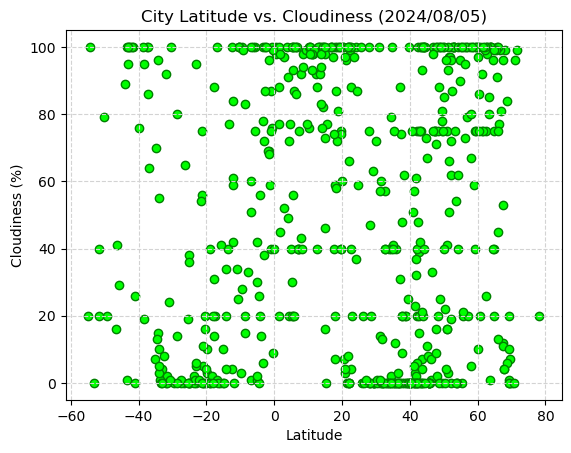

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], c="lime", linewidths=1, edgecolor="green", marker="o", label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2024/08/05)")
plt.grid (visible=True, which="major", axis="both", ls="--", c="lightgrey")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

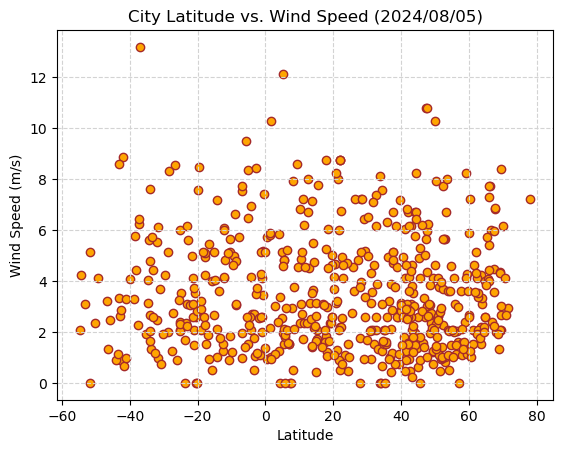

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], c="orange", linewidths=1, edgecolor="brown", marker="o", label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024/08/05)")
plt.grid (visible=True, which="major", axis="both", ls="--", c="lightgrey")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [81]:
# Define a function to create Linear Regression plots
def regression_plot(x_values, y_values, x_label, y_label, txt_location, hemisphere):
    #regression line parameters
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #scatter plot parameters
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, txt_location, fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{hemisphere} {x_label} vs {y_label}")

    print(f"The R-squared value is {rvalue**2:.5f}")


In [82]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ketchikan,55.3422,-131.6461,290.56,82,0,2.06,US,1722876249
3,lompoc,34.6391,-120.4579,295.29,98,100,1.54,US,1722875991
6,mesquite,32.7668,-96.5992,307.68,53,40,2.57,US,1722876254
8,vilyuchinsk,52.9306,158.4028,285.30,88,100,0.81,RU,1722876256
11,ocean shores,46.9737,-124.1563,289.27,90,100,2.57,US,1722876259


In [83]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,273.87,68,20,4.11,TF,1722876247
1,blackmans bay,-43.0167,147.3167,283.56,74,95,0.89,AU,1722876248
4,howard springs,-12.4970,131.0470,296.10,87,4,1.24,AU,1722875752
5,waitangi,-43.9535,-176.5597,281.38,93,89,0.89,NZ,1722876253
7,lebu,-37.6167,-73.6500,283.94,66,100,2.27,CL,1722876255


###  Temperature vs. Latitude Linear Regression Plot

The R-squared value is 0.38326


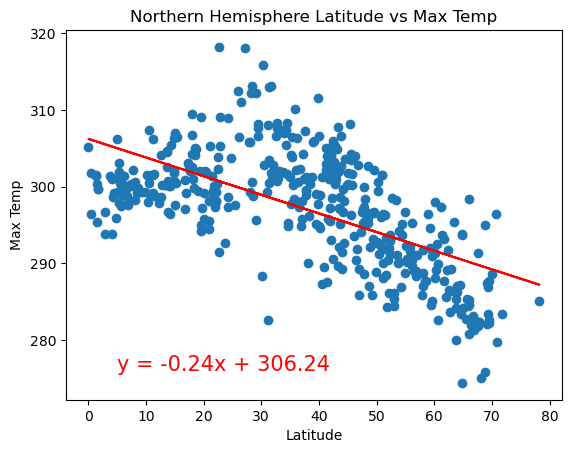

In [84]:
# Linear regression on Northern Hemisphere
hemisphere = "Northern Hemisphere"
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp"
txt_location = (5, 276)
regression_plot(x_values, y_values, x_label, y_label, txt_location, hemisphere)


The R-squared value is 0.66841


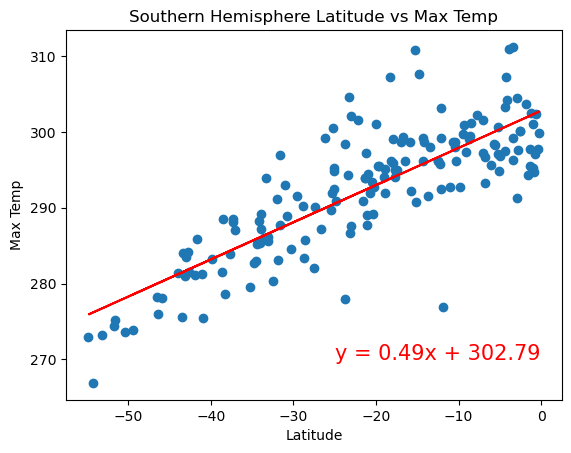

In [85]:
# Linear regression on Southern Hemisphere
hemisphere = "Southern Hemisphere"
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp"
txt_location = (-25, 270)
regression_plot(x_values, y_values, x_label, y_label, txt_location, hemisphere)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The R-squared value is 0.00044


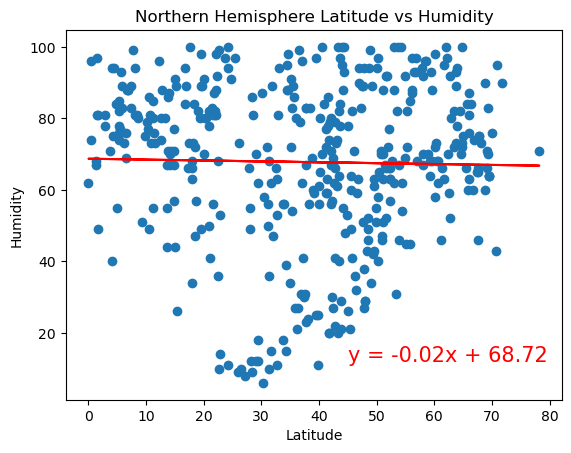

In [86]:
# Northern Hemisphere
hemisphere = "Northern Hemisphere"
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
txt_location = (45, 12)
regression_plot(x_values, y_values, x_label, y_label, txt_location, hemisphere)

The R-squared value is 0.02081


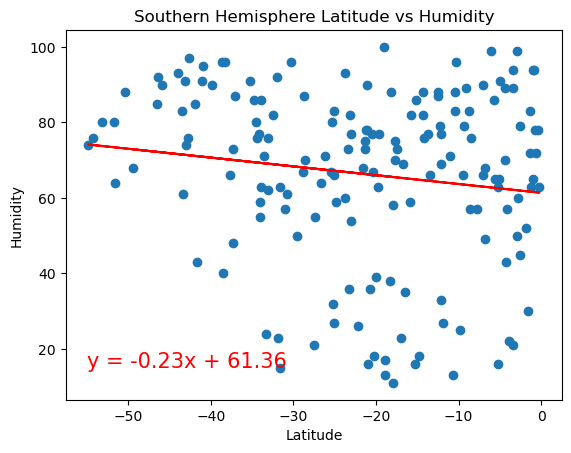

In [87]:
# Southern Hemisphere
hemisphere = "Southern Hemisphere"
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
txt_location = (-55, 15)
regression_plot(x_values, y_values, x_label, y_label, txt_location, hemisphere)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The R-squared value is 0.00663


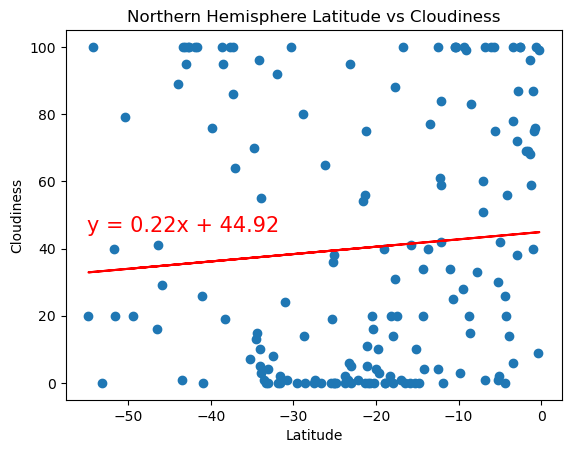

In [88]:
# Northern Hemisphere
hemisphere = "Northern Hemisphere"
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
txt_location = (-55, 45)
regression_plot(x_values, y_values, x_label, y_label, txt_location, hemisphere)

The R-squared value is 0.00663


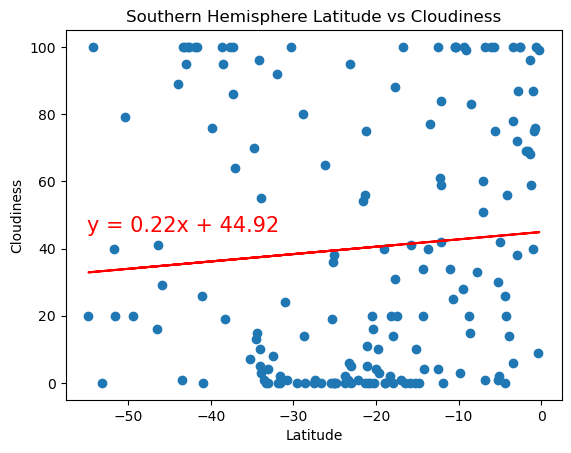

In [89]:
# Southern Hemisphere
hemisphere = "Southern Hemisphere"
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
txt_location = (-55, 45)
regression_plot(x_values, y_values, x_label, y_label, txt_location, hemisphere)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The R-squared value is 0.00162


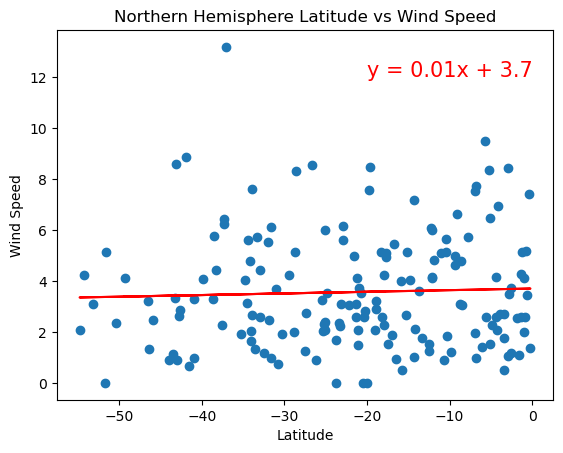

In [90]:
# Northern Hemisphere
hemisphere = "Northern Hemisphere"
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
txt_location = (-20, 12)
regression_plot(x_values, y_values, x_label, y_label, txt_location, hemisphere)

The R-squared value is 0.00162


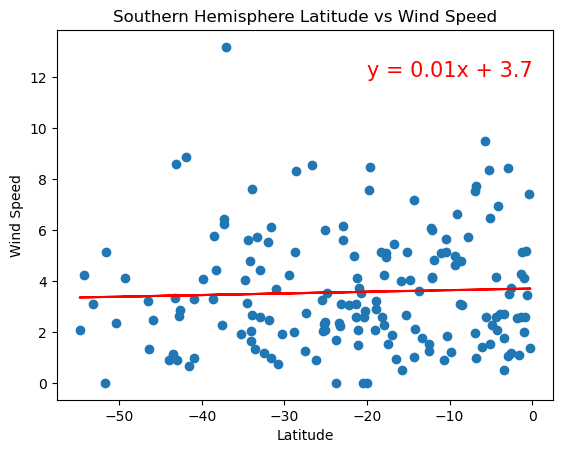

In [91]:
# Southern Hemisphere
hemisphere = "Southern Hemisphere"
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
txt_location = (-20, 12)
regression_plot(x_values, y_values, x_label, y_label, txt_location, hemisphere)

**Discussion about the linear relationship:** YOUR RESPONSE HERE